In [2]:
# load all require packs
import sys 
import pickle
import numpy as np
import json
from time import time
import matplotlib.pyplot as plt
from utils import BlackBoxSRCONObjective
from zoopt import Dimension, ValueType, Dimension2, Objective, Parameter, Opt, ExpOpt
from matplotlib import cm
from tqdm import tqdm
from scipy.special import expit, logsumexp

Using TensorFlow backend.
2023-07-06 10:21:25,262 - D:\SRCON_CODEHUB\gridHeight4\calculate_A\A_manger.py -__init__ -MainProcess-MainThread[line:44] - INFO: loading antenna gain file...
2023-07-06 10:21:25,263 - D:\SRCON_CODEHUB\gridHeight4\calculate_A\A_manger.py -__init__ -MainProcess-MainThread[line:46] - INFO: loading CSI weight file file...
2023-07-06 10:21:25,264 - D:\SRCON_CODEHUB\gridHeight4\calculate_A\A_manger.py -__init__ -MainProcess-MainThread[line:48] - INFO: loading SSB weight file file...


# choose dataset/define the optimization problem

We define a class "BlackBoxSRCONObjective" which transforms the srcon optimization problem into a black-box optimization problem with the interval constraint $[0,1]^{d}$

In [3]:
dataset = "nandong"#["hanjiang", "nandong","shangxi1", "shangxi34","sanxiandong" "songlin2", "songpo1","yuegu2"] 
objective = BlackBoxSRCONObjective(dataset) 

# some basic information
print("Number of Base stations:",objective.num_bs)
print("Number of parameters :",objective.num_para)
print("Base solution :",objective.base_solution) 
print("Baseline average SE :",objective.base_se)
all_grid_call_base = objective.call(objective.base_solution,all_grids = True)
Z_base=[np.sum([se*prob for se,prob in all_grid_call_base[inde].values()]) for inde in list(all_grid_call_base.keys())]

2023-07-06 10:21:27,332 - D:\SRCON_CODEHUB\gridHeight4\rf_and_ssb_opt\score.py -_revise_grid_to_cell_dict -MainProcess-MainThread[line:864] - INFO: total cell grid num: 7006
2023-07-06  10:21:27 Thu INFO total cell grid num: 7006
2023-07-06 10:21:27,334 - D:\SRCON_CODEHUB\gridHeight4\rf_and_ssb_opt\score.py -_revise_grid_to_cell_dict -MainProcess-MainThread[line:865] - INFO: L3 cell rsrp filter grid num: 0
2023-07-06  10:21:27 Thu INFO L3 cell rsrp filter grid num: 0
2023-07-06 10:21:27,335 - D:\SRCON_CODEHUB\gridHeight4\rf_and_ssb_opt\score.py -_revise_grid_to_cell_dict -MainProcess-MainThread[line:866] - INFO: Neigbor cell rsrp thd filter grid num: 2625
2023-07-06  10:21:27 Thu INFO Neigbor cell rsrp thd filter grid num: 2625
2023-07-06 10:21:27,337 - D:\SRCON_CODEHUB\gridHeight4\rf_and_ssb_opt\score.py -_revise_grid_to_cell_dict -MainProcess-MainThread[line:867] - INFO: Have no X! removed grid num: 1
2023-07-06  10:21:27 Thu INFO Have no X! removed grid num: 1
2023-07-06 10:21:27,34

Number of Base stations: 35
Number of parameters : 70
Base solution : [0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143 0.5        0.42857143
 0.5        0.42857143 0.5        0.42857143]
Baseline average SE : 2471.55


# transform the vector to cell-para dictionary

In [5]:
objective._var_transform(objective.base_solution)

{(3936301, 86): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 989): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 76): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 651): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 793): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 415): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3937607, 487): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 984): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 34): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936308, 729): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 901): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936300, 482): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3937674, 50): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3937661, 427): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936300, 285): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936301, 299): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936308, 307): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936308, 353): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3936300, 332): {'M_Azimuth': 0.0, 'M_Tilt': 0.0},
 (3937661, 421):

In [6]:
#

objective.cell_list

[(3936301, 86),
 (3936301, 989),
 (3936301, 76),
 (3936301, 651),
 (3936301, 793),
 (3936301, 415),
 (3937607, 487),
 (3936301, 984),
 (3936301, 34),
 (3936308, 729),
 (3936301, 901),
 (3936300, 482),
 (3937674, 50),
 (3937661, 427),
 (3936300, 285),
 (3936301, 299),
 (3936308, 307),
 (3936308, 353),
 (3936300, 332),
 (3937661, 421),
 (3937661, 765),
 (3936301, 756),
 (3937674, 82),
 (3936299, 338),
 (3937607, 463),
 (3937607, 294),
 (3936299, 794),
 (3937607, 350),
 (3936589, 893),
 (3937607, 986),
 (3937607, 17),
 (3936299, 467),
 (3936299, 452),
 (3937674, 633),
 (3937674, 519)]

In [7]:
objective.base_solution

array([0.5       , 0.42857143, 0.5       , 0.42857143, 0.5       ,
       0.42857143, 0.5       , 0.42857143, 0.5       , 0.42857143,
       0.5       , 0.42857143, 0.5       , 0.42857143, 0.5       ,
       0.42857143, 0.5       , 0.42857143, 0.5       , 0.42857143,
       0.5       , 0.42857143, 0.5       , 0.42857143, 0.5       ,
       0.42857143, 0.5       , 0.42857143, 0.5       , 0.42857143,
       0.5       , 0.42857143, 0.5       , 0.42857143, 0.5       ,
       0.42857143, 0.5       , 0.42857143, 0.5       , 0.42857143,
       0.5       , 0.42857143, 0.5       , 0.42857143, 0.5       ,
       0.42857143, 0.5       , 0.42857143, 0.5       , 0.42857143,
       0.5       , 0.42857143, 0.5       , 0.42857143, 0.5       ,
       0.42857143, 0.5       , 0.42857143, 0.5       , 0.42857143,
       0.5       , 0.42857143, 0.5       , 0.42857143, 0.5       ,
       0.42857143, 0.5       , 0.42857143, 0.5       , 0.42857143])

# define the p10 function and smoothed p10 function

In [4]:
def p10_func(x):
    all_grid_call_base = objective.call(x,all_grids = True)
    Z_base=[np.sum([se*prob for se,prob in all_grid_call_base[inde].values()]) for inde in list(all_grid_call_base.keys())]
    return np.quantile(Z_base,0.1)

def smooth_p10_func_newton(x,tau=100): # tau is the parameter that controls smoothness, when tau ->0, the function approximates p10.
    alpha=0.1
    all_grid_call_base = objective.call(x,all_grids = True)
    Z_base=np.array([np.sum([se*prob for se,prob in all_grid_call_base[inde].values()]) for inde in list(all_grid_call_base.keys())])
    
    opt_c=np.mean(Z_base)
    newton_step = 1
    while np.abs(newton_step)>1e-2:
        expit_c =  expit((np.array(Z_base)-opt_c)/tau)
        newton_step = tau * (np.mean(expit_c) + alpha- 1) / np.mean(expit_c * (1-expit_c))
        opt_c+=newton_step
    
    return opt_c


# coordinate ascent algorithm

At each step, pick a coordinate to optimize. The optimization is performed by first split $[0,1]$ into $15$ points, and then do exhaustive search.

In [5]:
def coordinate_opt(func, initial, num_sweep = 10):
    base_value = func(initial)
    now_solution = initial.copy()
    cd_queries = [now_solution.copy()]
    test_point = np.linspace(0,1,15)
    picked = -1
    pbar = tqdm(range(num_sweep),unit="sweep")
    log = {"p10":[p10_func(now_solution)]}
    for _ in pbar:
        shuffled = np.random.permutation(objective.num_para)
        for picked in shuffled:
            try_solution = now_solution.copy()
            try_xi = []
            try_obj = []
            old_xi = try_solution[picked]
            for xi in test_point:
                try_solution[picked] = xi
                try_xi.append(xi)
                obj = func(try_solution)
                pbar.set_postfix(obj=obj)
                cd_queries.append(try_solution)
                
                #log["mean"].append(mean_func(try_solution))
                log["p10"].append(p10_func(try_solution))
                #log["smooth_p10"].append(smooth_p10_func(try_solution))
                
                try_obj.append(obj)
            now_solution[picked] = try_xi[np.argmax(try_obj)].copy()
            
    return cd_queries, log

# Using coordinate ascent algorithm to do optimization, with p10 and smoothed p10 as objective function

In [6]:
# optimize p10
cord_p10_sols, cord_p10_logs  = coordinate_opt(p10_func, objective.base_solution, num_sweep = 10)

# optimize smoothed p10
cord_smooth_newton_p10_sols, cord_smooth_newton_p10_logs  = coordinate_opt(smooth_p10_func_newton, objective.base_solution, num_sweep = 10)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:24<00:00, 26.45s/sweep, obj=1.8e+3]


# Visualization of the optimization log

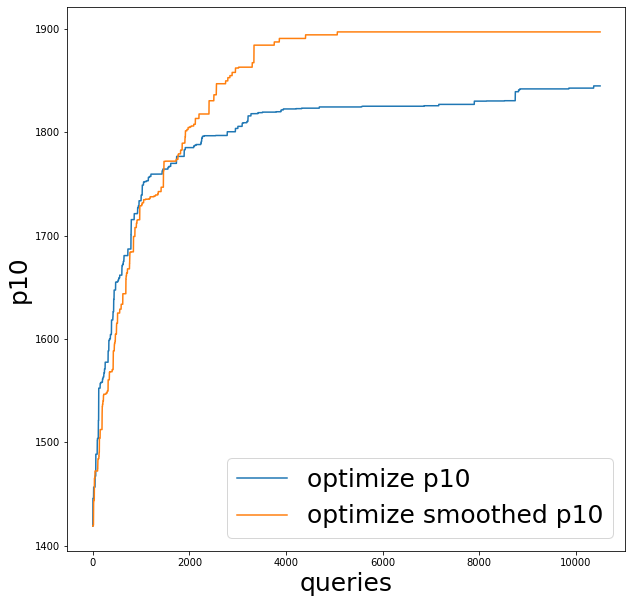

In [8]:
def pick_max(arr):
    new_arr = [arr[0]]
    for a in arr[1:]:
        new_arr.append(max([new_arr[-1],a]))
    return new_arr

plt.figure(figsize=(10,10))
plt.plot(pick_max(cord_p10_logs["p10"]), label=r"optimize p10")
plt.plot(pick_max(cord_smooth_newton_p10_logs["p10"]), label=r"optimize smoothed p10")

plt.legend(prop={'size': 25})
plt.xlabel("queries",fontsize=25)
plt.ylabel("p10",fontsize=25)
plt.show()